In [1]:
import pandas as pd

data was uploaded from https://github.com/CSSEGISandData/COVID-19

In [2]:
url_case = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# df = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col=1)
df = pd.read_csv(url_case, index_col=1)

In [3]:
# df.head()

In [4]:
list_ = [i for i in range(0, 15)] # 0 cases list

df_1 = df.drop(['Lat', 'Long','Province/State'], axis=1)
df_1 = df_1.drop(df_1.columns[list_], axis='columns')
# df_1

In [5]:
df_1 = df_1[(df_1.index == 'US') \
            | (df_1.index == 'Russia') | (df_1.index == 'Italy')\
            | (df_1.index == 'Germany') | (df_1.index == 'Spain')\
            | (df_1.index == 'Switzerland') | (df_1.index == 'Sweden')\
            | (df_1.index == 'Norway') | (df_1.index == 'Poland')\
            | (df_1.index == 'Ukraine') | (df_1.index == 'Estonia')]


df_c_avg = df_1.copy()
df_1

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0,0,0,0,0,0,0,0,0,0,...,1459,1512,1528,1535,1552,1559,1592,1605,1635,1643
Germany,12,13,13,14,14,16,16,16,16,16,...,141397,143342,145184,147065,148291,150648,153129,154999,156513,157770
Italy,2,3,3,3,3,3,3,3,3,3,...,172434,175925,178972,181228,183957,187327,189973,192994,195351,197675
Norway,0,0,0,0,0,0,0,0,0,0,...,6937,7036,7078,7156,7191,7338,7401,7463,7499,7527
Poland,0,0,0,0,0,0,0,0,0,0,...,8379,8742,9287,9593,9856,10169,10511,10892,11273,11617
Russia,2,2,2,2,2,2,2,2,2,2,...,32008,36793,42853,47121,52763,57999,62773,68622,74588,80949
Spain,1,1,1,2,2,2,2,2,2,2,...,190839,191726,198674,200210,204178,208389,213024,219764,223759,226629
Sweden,1,1,1,1,1,1,1,1,1,1,...,13216,13822,14385,14777,15322,16004,16755,17567,18177,18640
Switzerland,0,0,0,0,0,0,0,0,0,0,...,27078,27404,27740,27944,28063,28268,28496,28677,28894,29061


In [6]:
df_2 = df_1.dropna().T
df_2['Russia'].plot(c='r', figsize=(15, 10), title='cases',legend="Russia",)
df_2['US'].plot(c='g', legend="US")
df_2['Spain'].plot(c='orange', legend='Spain')
df_2['Germany'].plot(c='k',legend="Germany")
df_2['Italy'].plot(c='b', legend="It", ).grid()


In [7]:
df_pop = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')
df_pop = df_pop.drop(['UID', 'iso2','iso3','code3','FIPS',\
                      'Admin2','Lat','Long_', 'Province_State','Combined_Key'], axis=1)


In [8]:
# df_pop.shape

In [9]:
# df_pop.head()

In [10]:
df_pop = df_pop.drop(df_pop.index[267:3574]) # reduce number of US's cells
df_pop = df_pop[(df_pop['Country_Region'] == 'US') | (df_pop['Country_Region'] == 'Russia') \
                | (df_pop['Country_Region'] == 'Italy') | (df_pop['Country_Region'] == 'Spain') \
                | (df_pop['Country_Region'] == 'Germany') | (df_pop['Country_Region'] == 'Switzerland')\
                | (df_pop['Country_Region'] == 'Sweden') | (df_pop['Country_Region'] == 'Norway')\
                | (df_pop['Country_Region'] == 'Poland') | (df_pop['Country_Region'] == 'Ukraine')\
                | (df_pop['Country_Region'] == 'Estonia')]
# df_pop


In [11]:
df_pop.rename(columns={'Country_Region' : 'Country/Region'}, inplace=True)
df_pop

,Country/Region,Population
53,Estonia,1326539.0
62,Germany,83783945.0
81,Italy,60461828.0
123,Norway,5421242.0
131,Poland,37846605.0
135,Russia,145934460.0
153,Spain,46754783.0
157,Sweden,10099270.0
158,Switzerland,8654618.0
169,Ukraine,43733759.0


In [12]:
df_pop.set_index('Country/Region', inplace=True)
# df_pop, df_pop.shape

In [13]:
df_per_capita = df_1.copy()
# df_per_capita

In [14]:
df_per_capita[0:1] = df_1[0:1].div(df_pop.iloc[0][0])
df_per_capita[1:2] = df_1[1:2].div(df_pop.iloc[1][0])
df_per_capita[2:3] = df_1[2:3].div(df_pop.iloc[2][0])
df_per_capita[3:4] = df_1[3:4].div(df_pop.iloc[3][0])
df_per_capita[4:5] = df_1[4:5].div(df_pop.iloc[4][0])

df_per_capita[5:6] = df_1[5:6].div(df_pop.iloc[5][0])
df_per_capita[6:7] = df_1[6:7].div(df_pop.iloc[6][0])
df_per_capita[7:8] = df_1[7:8].div(df_pop.iloc[7][0])
df_per_capita[8:9] = df_1[8:9].div(df_pop.iloc[8][0])
df_per_capita[9:10] = df_1[9:10].div(df_pop.iloc[9][0])
df_per_capita[10:11] = df_1[10:11].div(df_pop.iloc[10][0])

In [15]:
df_per_capita

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001100,0.001140,0.001152,0.001157,0.001170,0.001175,0.001200,0.001210,0.001233,0.001239
Germany,1.432255e-07,1.551610e-07,1.551610e-07,1.670965e-07,1.670965e-07,1.909674e-07,1.909674e-07,1.909674e-07,1.909674e-07,1.909674e-07,...,0.001688,0.001711,0.001733,0.001755,0.001770,0.001798,0.001828,0.001850,0.001868,0.001883
Italy,3.307872e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,...,0.002852,0.002910,0.002960,0.002997,0.003043,0.003098,0.003142,0.003192,0.003231,0.003269
Norway,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001280,0.001298,0.001306,0.001320,0.001326,0.001354,0.001365,0.001377,0.001383,0.001388
Poland,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000221,0.000231,0.000245,0.000253,0.000260,0.000269,0.000278,0.000288,0.000298,0.000307
Russia,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,...,0.000219,0.000252,0.000294,0.000323,0.000362,0.000397,0.000430,0.000470,0.000511,0.000555
Spain,2.138819e-08,2.138819e-08,2.138819e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,...,0.004082,0.004101,0.004249,0.004282,0.004367,0.004457,0.004556,0.004700,0.004786,0.004847
Sweden,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,...,0.001309,0.001369,0.001424,0.001463,0.001517,0.001585,0.001659,0.001739,0.001800,0.001846
Switzerland,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.003129,0.003166,0.003205,0.003229,0.003243,0.003266,0.003293,0.003313,0.003339,0.003358


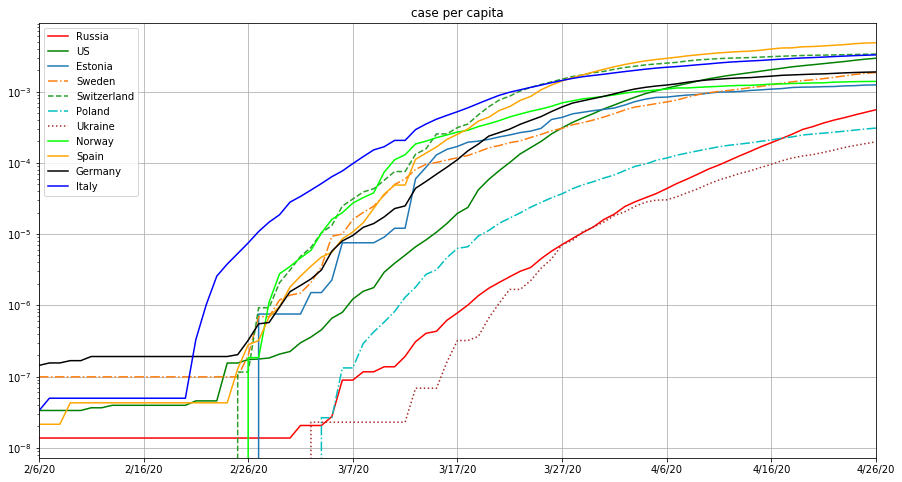

In [16]:
df_4_ = df_per_capita.T
df_4_['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='case per capita')
df_4_['US'].plot(c='g', legend="US", linestyle='solid')
df_4_['Estonia'].plot(legend="Est")
df_4_['Sweden'].plot(legend="Sw", linestyle='-.')
df_4_['Switzerland'].plot(legend="S", linestyle='--')
df_4_['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_4_['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_4_['Norway'].plot(c='lime',legend="Nor")
df_4_['Spain'].plot(c='orange',legend="Spain", )
df_4_['Germany'].plot(c='k',legend="Germany", )
df_4_['Italy'].plot(c='b', legend="It", logy=True).grid()

In [17]:
url_death = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# df_death = pd.read_csv('time_series_covid19_deaths_global.csv', index_col=1)
df_death = pd.read_csv(url_death, index_col=1)
df_death.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,30,30,33,36,36,40,42,43,47,50
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,26,26,26,26,26,27,27,27,27,28
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,364,367,375,384,392,402,407,415,419,425
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,35,35,36,37,37,37,37,40,40,40
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [18]:
df_death = df_death.drop(['Lat', 'Long','Province/State'], axis=1)

df_death = df_death.drop(df_death.columns[list_], axis='columns')
# df_death

In [19]:
df_death = df_death[(df_death.index == 'US') \
                    | (df_death.index == 'Russia') | (df_death.index == 'Italy')\
                    | (df_death.index == 'Spain') | (df_death.index == 'Germany')
                    | (df_death.index == 'Sweden') | (df_death.index == 'Poland')\
                    | (df_death.index == 'Estonia') | (df_death.index == 'Norway')
                    | (df_death.index == 'Ukraine') | (df_death.index == 'Switzerland')]

df_death

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0,0,0,0,0,0,0,0,0,0,...,38,38,40,40,43,44,45,46,46,49
Germany,0,0,0,0,0,0,0,0,0,0,...,4352,4459,4586,4862,5033,5279,5575,5760,5877,5976
Italy,0,0,0,0,0,0,0,0,0,0,...,22745,23227,23660,24114,24648,25085,25549,25969,26384,26644
Norway,0,0,0,0,0,0,0,0,0,0,...,161,164,165,181,182,187,194,199,201,201
Poland,0,0,0,0,0,0,0,0,0,0,...,332,347,360,380,401,426,454,494,524,535
Russia,0,0,0,0,0,0,0,0,0,0,...,273,313,361,405,456,513,555,615,681,747
Spain,0,0,0,0,0,0,0,0,0,0,...,20002,20043,20453,20852,21282,21717,22157,22524,22902,23190
Sweden,0,0,0,0,0,0,0,0,0,0,...,1400,1511,1540,1580,1765,1937,2021,2152,2192,2194
Switzerland,0,0,0,0,0,0,0,0,0,0,...,1327,1368,1393,1429,1478,1509,1549,1589,1599,1610


In [20]:
df_death_to_case = df_death / df_1
df_death_to_case = df_death_to_case.fillna(0)

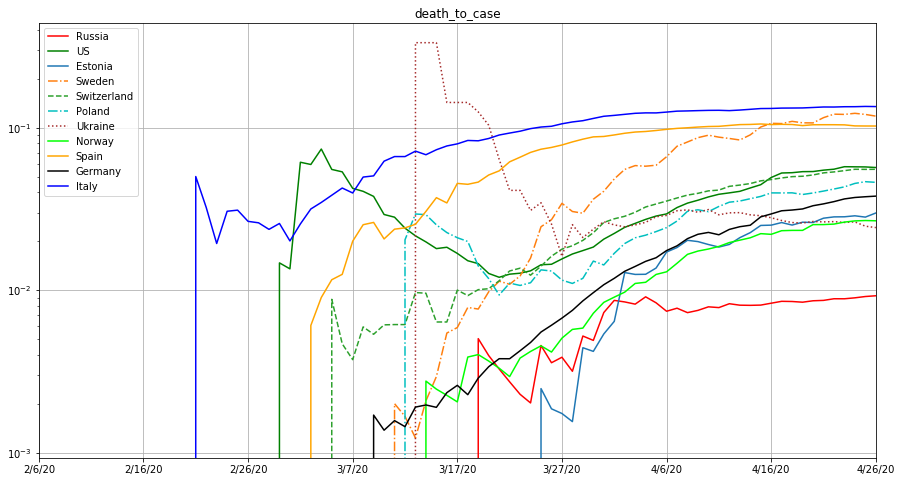

In [21]:
df_5 = df_death_to_case.T
df_5['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death_to_case',)
df_5['US'].plot(c='g',legend="US",)
df_5['Estonia'].plot(legend="Est")
df_5['Sweden'].plot(legend="Sw", linestyle='-.')
df_5['Switzerland'].plot(legend="S", linestyle='--')
df_5['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_5['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_5['Norway'].plot(c='lime',legend="Nor")
df_5['Spain'].plot(c='orange',legend="Spain", )
df_5['Germany'].plot(c='k',legend="Germany", )
df_5['Italy'].plot(c='b', legend="It", logy=True).grid()


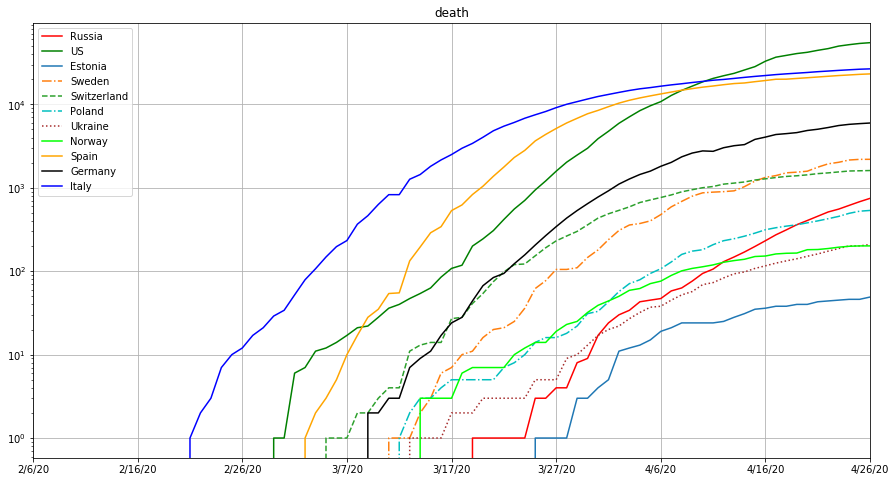

In [22]:
df_6 = df_death.T
df_6['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death', logy=True)
df_6['US'].plot(c='g', legend="US", )
df_6['Estonia'].plot(legend="Est")
df_6['Sweden'].plot(legend="Sw",linestyle='-.' )
df_6['Switzerland'].plot(legend="S", linestyle='--')
df_6['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_6['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_6['Norway'].plot(c='lime',legend="Nor")
df_6['Spain'].plot(c='orange',legend="Spain")
df_6['Germany'].plot(c='k',legend="Germany")
df_6['Italy'].plot(c='b', legend="It").grid()

In [23]:
# df['gdp'] = df['gdp'].shift(-1)
# df_per_capita
# df_death_to_case
# df_death

df_death_to_case = df_death_to_case.drop(df_death_to_case.columns[[i for i in range(0, 14)]], axis='columns')
# df_death_to_case

In [24]:
df_death_to_case.iloc[0] = df_death_to_case.iloc[0].shift(-33)
df_death_to_case.iloc[1] = df_death_to_case.iloc[1].shift(-17)
df_death_to_case.iloc[3] = df_death_to_case.iloc[3].shift(-22)
df_death_to_case.iloc[4] = df_death_to_case.iloc[4].shift(-20)
df_death_to_case.iloc[5] = df_death_to_case.iloc[5].shift(-27)
df_death_to_case.iloc[6] = df_death_to_case.iloc[6].shift(-11)
df_death_to_case.iloc[7] = df_death_to_case.iloc[7].shift(-19)
df_death_to_case.iloc[8] = df_death_to_case.iloc[8].shift(-13)
df_death_to_case.iloc[9] = df_death_to_case.iloc[9].shift(-21)
df_death_to_case.iloc[-1] = df_death_to_case.iloc[-1].shift(-8)

avg = df_death_to_case.T.mean(numeric_only=True, axis=1)


df_death_to_case_T = df_death_to_case.T
df_death_to_case_T['Avg'] = avg
df_death_to_case = df_death_to_case_T.T

# df_death_to_case
avg_d_t_c = avg.copy()


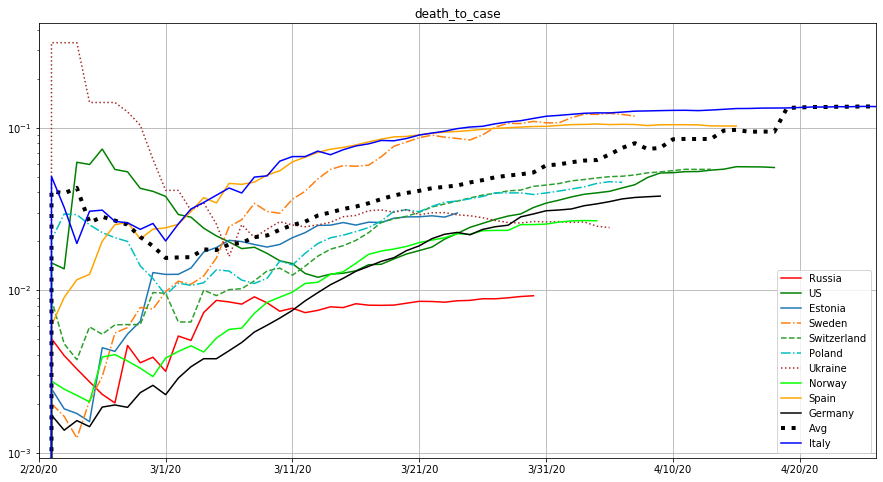

In [25]:
df_5 = df_death_to_case.T
df_5['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death_to_case',)
df_5['US'].plot(c='g',legend="US",)
df_5['Estonia'].plot(legend="Est")
df_5['Sweden'].plot(legend="Sw", linestyle='-.')
df_5['Switzerland'].plot(legend="S", linestyle='--')
df_5['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_5['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_5['Norway'].plot(c='lime',legend="Nor")
df_5['Spain'].plot(c='orange',legend="Spain", )
df_5['Germany'].plot(c='k',legend="Germany", )
df_5['Avg'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_5['Italy'].plot(c='b', legend="It", logy=True).grid()

In [26]:
# df_per_capita.T

In [27]:
# per capita average

df_per_capita.iloc[0] = df_per_capita.iloc[0].shift(-13)
df_per_capita.iloc[1] = df_per_capita.iloc[1].shift(-11)
df_per_capita.iloc[2] = df_per_capita.iloc[2].shift(-6)
df_per_capita.iloc[3] = df_per_capita.iloc[3].shift(-12)
df_per_capita.iloc[4] = df_per_capita.iloc[4].shift(-21)
df_per_capita.iloc[5] = df_per_capita.iloc[5].shift(-21)
df_per_capita.iloc[6] = df_per_capita.iloc[6].shift(-11)
df_per_capita.iloc[7] = df_per_capita.iloc[7].shift(-11)
df_per_capita.iloc[8] = df_per_capita.iloc[8].shift(-11)
df_per_capita.iloc[9] = df_per_capita.iloc[9].shift(-30)
df_per_capita.iloc[-1] = df_per_capita.iloc[-1].shift(-10)

avg_case = df_per_capita.T.mean(numeric_only=True, axis=1)
avg_case, type(avg_case)

df_per_capita_T = df_per_capita.T
df_per_capita_T['Average'] = avg_case
df_per_capita = df_per_capita_T.T

# df_per_capita, avg_case

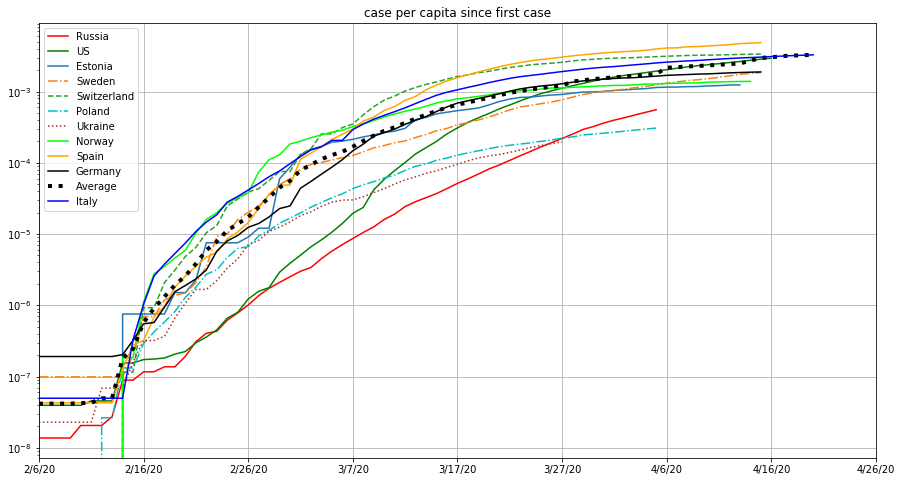

In [28]:
df_4 = df_per_capita_T
df_4['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='case per capita since first case')
df_4['US'].plot(c='g', legend="US", linestyle='solid')
df_4['Estonia'].plot(legend="Est")
df_4['Sweden'].plot(legend="Sw", linestyle='-.')
df_4['Switzerland'].plot(legend="S", linestyle='--')
df_4['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_4['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_4['Norway'].plot(c='lime',legend="Nor")
df_4['Spain'].plot(c='orange',legend="Spain", )
df_4['Germany'].plot(c='k',legend="Germany", )
df_4['Average'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_4['Italy'].plot(c='b', legend="It", logy=True).grid()

In [29]:
df_d = df_death.copy()
df_d.iloc[0] = df_d.iloc[0].shift(-43)
df_d.iloc[1] = df_d.iloc[1].shift(-24)
df_d.iloc[2] = df_d.iloc[2].shift(-7)
df_d.iloc[3] = df_d.iloc[3].shift(-29)
df_d.iloc[4] = df_d.iloc[4].shift(-27)
df_d.iloc[5] = df_d.iloc[5].shift(-39)
df_d.iloc[6] = df_d.iloc[6].shift(-18)
df_d.iloc[7] = df_d.iloc[7].shift(-28)
df_d.iloc[8] = df_d.iloc[8].shift(-22)
df_d.iloc[9] = df_d.iloc[9].shift(-31)
df_d.iloc[10] = df_d.iloc[10].shift(-16)

avg_death = df_d.T.mean(numeric_only=True, axis=1)
# avg_death, type(avg_death)

df_death_T = df_d.T
df_death_T['average'] = avg_death
df_death = df_death_T.T

# df_death

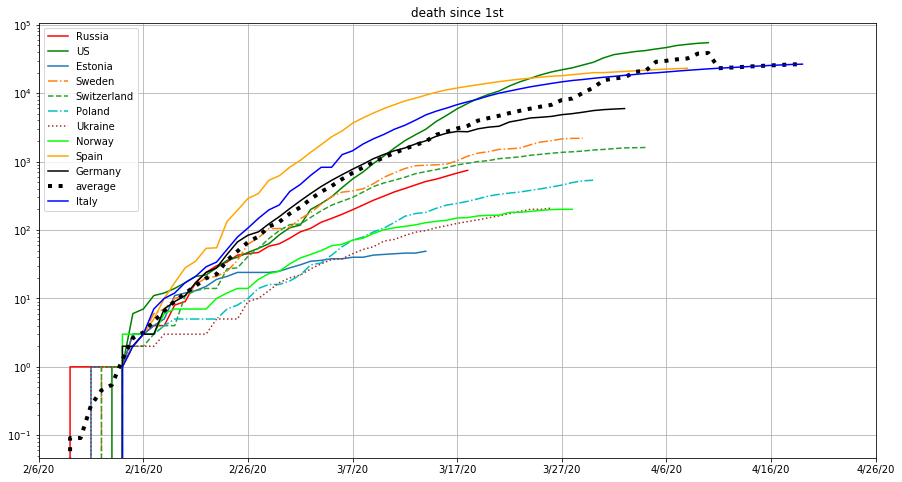

In [30]:
df_6 = df_death.T
df_6['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death since 1st', logy=True)
df_6['US'].plot(c='g', legend="US", )
df_6['Estonia'].plot(legend="Est")
df_6['Sweden'].plot(legend="Sw",linestyle='-.' )
df_6['Switzerland'].plot(legend="S", linestyle='--')
df_6['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_6['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_6['Norway'].plot(c='lime',legend="Nor")
df_6['Spain'].plot(c='orange',legend="Spain")
df_6['Germany'].plot(c='k',legend="Germany")
df_6['average'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_6['Italy'].plot(c='b', legend="It").grid()

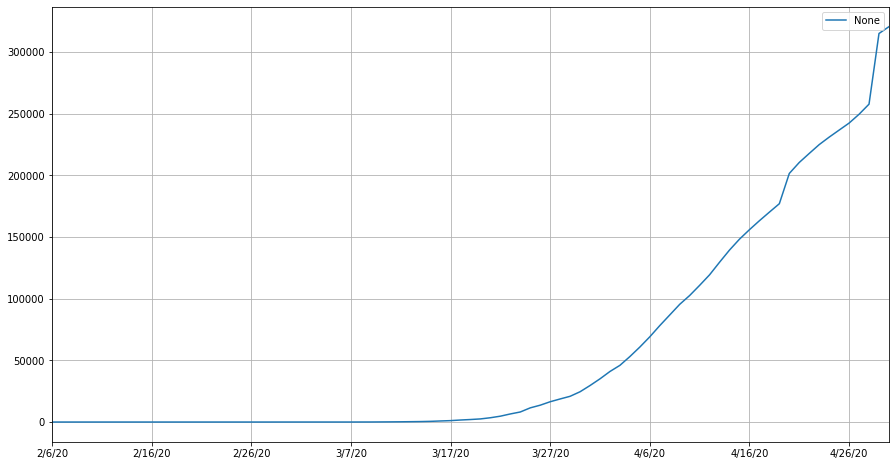

In [42]:
import numpy as np

for d in range(17, 31):
    avg_case[f'4/{d}/20']=np.nan
    avg_d_t_c[f'4/{d}/20']=np.nan
    
pred_case_rus = (avg_case.shift(23) * df_pop.iloc[5][0]).fillna(0)
# (df_4_['Russia']).shift(21).plot(c='r', figsize=(15, 8), legend="RU", title='case per capita',)
pred_case_rus.plot(logy=False, legend="pred",figsize=(15, 8)).grid()

In [32]:
# df_death_T = df_d.T
# df_death_T['average'] = avg_death
# df_death = df_death_T.T

df_c_avg_T = df_c_avg.T
df_c_avg_T['Rus_pred'] = pred_case_rus.round().fillna(0)
df_c_avg = df_c_avg_T.T.fillna(0)
df_c_avg.tail(7)



,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,32008.0,36793.0,42853.0,47121.0,52763.0,57999.0,62773.0,68622.0,74588.0,80949.0
Spain,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,190839.0,191726.0,198674.0,200210.0,204178.0,208389.0,213024.0,219764.0,223759.0,226629.0
Sweden,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,13216.0,13822.0,14385.0,14777.0,15322.0,16004.0,16755.0,17567.0,18177.0,18640.0
Switzerland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27078.0,27404.0,27740.0,27944.0,28063.0,28268.0,28496.0,28677.0,28894.0,29061.0
Ukraine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4662.0,5106.0,5449.0,5710.0,6125.0,6592.0,7170.0,7647.0,8125.0,8617.0
US,11.0,11.0,11.0,11.0,11.0,12.0,12.0,13.0,13.0,13.0,...,699706.0,732197.0,758809.0,784326.0,811865.0,840351.0,869170.0,905358.0,938154.0,965785.0
Rus_pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163215.0,170165.0,177005.0,201539.0,210450.0,217760.0,224926.0,230987.0,236693.0,242372.0


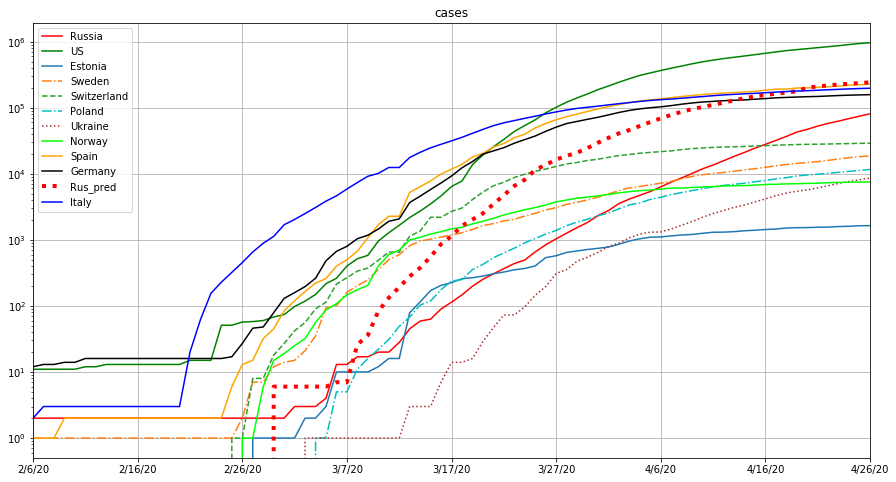

In [33]:
_df_4_ = df_c_avg.T
_df_4_['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='cases')
_df_4_['US'].plot(c='g', legend="US", linestyle='solid')
_df_4_['Estonia'].plot(legend="Est")
_df_4_['Sweden'].plot(legend="Sw", linestyle='-.')
_df_4_['Switzerland'].plot(legend="S", linestyle='--')
_df_4_['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
_df_4_['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
_df_4_['Norway'].plot(c='lime',legend="Nor")
_df_4_['Spain'].plot(c='orange',legend="Spain", )
_df_4_['Germany'].plot(c='k',legend="Germany", )
_df_4_['Rus_pred'].plot(c='r',legend="Avg",lw=4, linestyle=':', )
_df_4_['Italy'].plot(c='b', legend="It", logy=True).grid()

In [34]:
avg_d_t_c 
pred_d_to_c_rus = avg_d_t_c .shift(8).fillna(0)


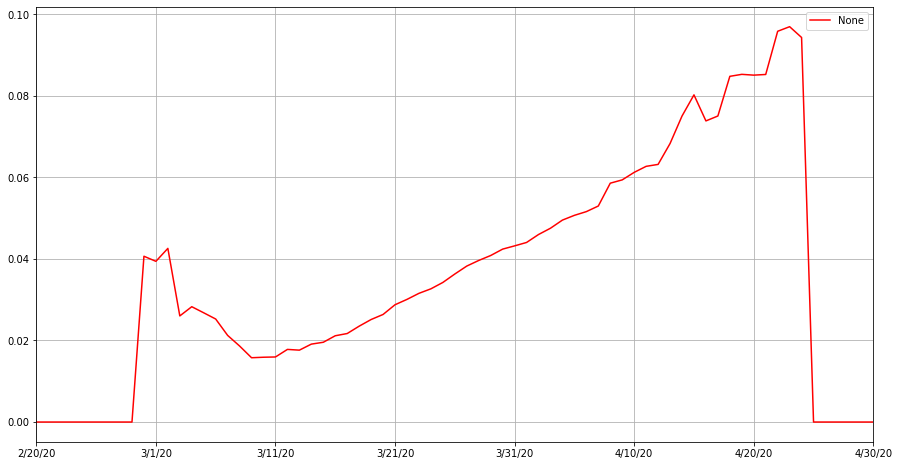

In [41]:
pred_d_to_c_rus.plot(logy=False, legend="pred", figsize=(15, 8), c='r').grid()

In [36]:
for k in range(7, 21):
    pred_case_rus=pred_case_rus.drop(index=f'2/{k}/20')

In [37]:
pred_death_rus = [0]
for m in range(len(pred_d_to_c_rus)):
    pred_death_rus.append(pred_d_to_c_rus[m] * pred_case_rus[m])
    
pred_death_rus = pd.Series(pred_death_rus)
# pred_death_rus

In [38]:
# labels = ['2/20/20', '3/1/20', '3/11/20', '3/21/20', '3/31/20', '4/10/20', '4/20/20', '4/30/20']
# loc = [0,10,20,30,40,50,60,70]
# xticks = {loc: labels}
# pred_death_rus.plot(logy=False, c='r', legend="pred",title='60 -> 20/4/2020').grid()

In [39]:
date_= pd.Series(df_1.iloc[0].index)    
# date_

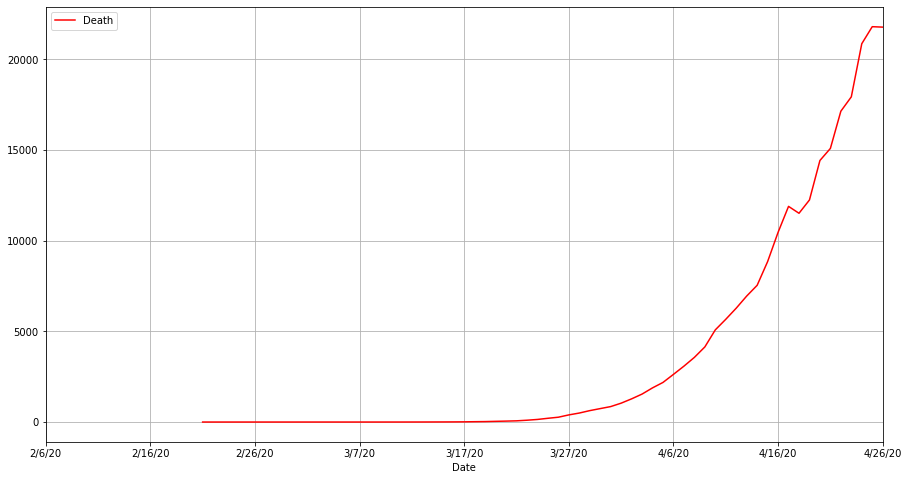

In [40]:
d = pd.DataFrame({'Date' : date_, 'Death': pred_death_rus}, )
d['Death'] = d['Death'].shift(15)
d.set_index('Date', inplace=True)
d.plot(c='r',figsize=(15, 8)).grid()